<div style="border: 5px solid purple; padding: 15px; margin: 5px">
<b> Reviewer's comment</b>
    
Hi Jimmy! My name is Svetlana (https://hub.tripleten.com/u/6dee602c).  Congratulations on submitting another project! 🎉
    

Before we start, I want to pay your attention to the color marking:


<div style="border: 5px solid green; padding: 15px; margin: 5px">

Great solutions and ideas that can and should be used in the future are in green comments. Some of them are: 
    
    
- You have successfully prepared the subsets. It is important to split the data correctly in order to ensure there's no intersection;    
    
    
- Used linear regression to make predictions;
    

- Wrote an excellent conclusion! A well-written conclusion shows how the project met its objectives and provides a concise and understandable summary for those who may not have been involved in the details of the project. Good job! 

</div>
    
<div style="border: 5px solid gold; padding: 15px; margin: 5px">
<b> Reviewer's comment </b>

Yellow color indicates what should be optimized. This is not necessary, but it will be great if you make changes to this project. I've left several recommendations throughout the project. 
    
</div>

<hr>
    
<font color='dodgerblue'>**To sum up:**</font> you did a great job here, thank you so much for submitting the project! Actually the project is almost perfect, and the updates should not take much time. If you have any questions, please feel free to ask. I will wait the project for the second review 😊 
    

<hr>
    
Please use some color other than those listed to highlight answers to my comments.
I would also ask you **not to change, move or delete my comments** to make it easier for me to navigate during the next review.
    
<hr> 
    
✍️ Here's a nice [article](https://machinelearningmastery.com/a-gentle-introduction-to-the-bootstrap-method/) about the bootstrap method. [This](https://www.youtube.com/watch?v=O_Fj4q8lgmc&list=LL&index=6) is a good video about resampling in bootstrapping.
    
<hr>
    
    
📌 Please feel free to schedule a 1:1 sessions with our tutors or TAs [here](https://calendly.com/tripleten-ds-experts-team), join daily coworking sessions, or ask questions on TripleTen Hub if you need assistance 😉 




# Step 1: Download and prepare the data. Explain the procedure.

<strong>Project Overview:</strong>

The goal of this project is to assist OilyGiant, a mining company, in selecting the most profitable region to drill a new oil well. The company provided data from three regions, each with the same features and target variable — the volume of oil reserves (in thousand barrels). 

We will:

- Prepare and explore the data from each region
- Train a Linear Regression model to predict oil reserves
- Calculate potential profits and evaluate risks
- Use Bootstrapping to estimate uncertainty in profit
- Recommend the best region based on expected returns and risk

Let's begin by loading and inspecting the data.

<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment  </b>
    
Great! 
</div>

In [ ]:
# Download and prepare the data.
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# preparing the data
g0 = pd.read_csv('/datasets/geo_data_0.csv')
g1 = pd.read_csv('/datasets/geo_data_1.csv')
g2 = pd.read_csv('/datasets/geo_data_2.csv')

In [ ]:
# Looking at g0 table
display(g0.head())

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [ ]:
# now the g1 table
display(g1.head())

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [ ]:
# finally, th g2 table
display(g2.head())

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


<div style='font-size:18px'> Let's use the .info() to see if we're missing any data

In [ ]:
# start with g0
g0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [7]:
# g1
g1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [8]:
# lastly g2
g2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [9]:
# Drop 'id' column
g0 = g0.drop(columns='id')
g1 = g1.drop(columns='id')
g2 = g2.drop(columns='id')

# Check for duplicates
print("Region 0 duplicates:", g0.duplicated().sum())
print("Region 1 duplicates:", g1.duplicated().sum())
print("Region 2 duplicates:", g2.duplicated().sum())

# Drop duplicates if any
g0 = g0.drop_duplicates()
g1 = g1.drop_duplicates()
g2 = g2.drop_duplicates()


Region 0 duplicates: 0
Region 1 duplicates: 0
Region 2 duplicates: 0



✅ <strong>Duplicate Check Summary:</strong>
No dupes were found in any dataset. 



<div style='font-size:18px'> Okay, looks like there aren't any missing data from the three regions. 
<li> Let's start training and testing the LinearRegression model for each region
    
</div>


<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>

Well done! It is indeed important to check data for the duplicates, since we are going to split the data. You can also check for the duplicates in the `id` columns. We do not need to delete them, since these columns will not be considered, and we can interpret these points as different objects.     
</div>

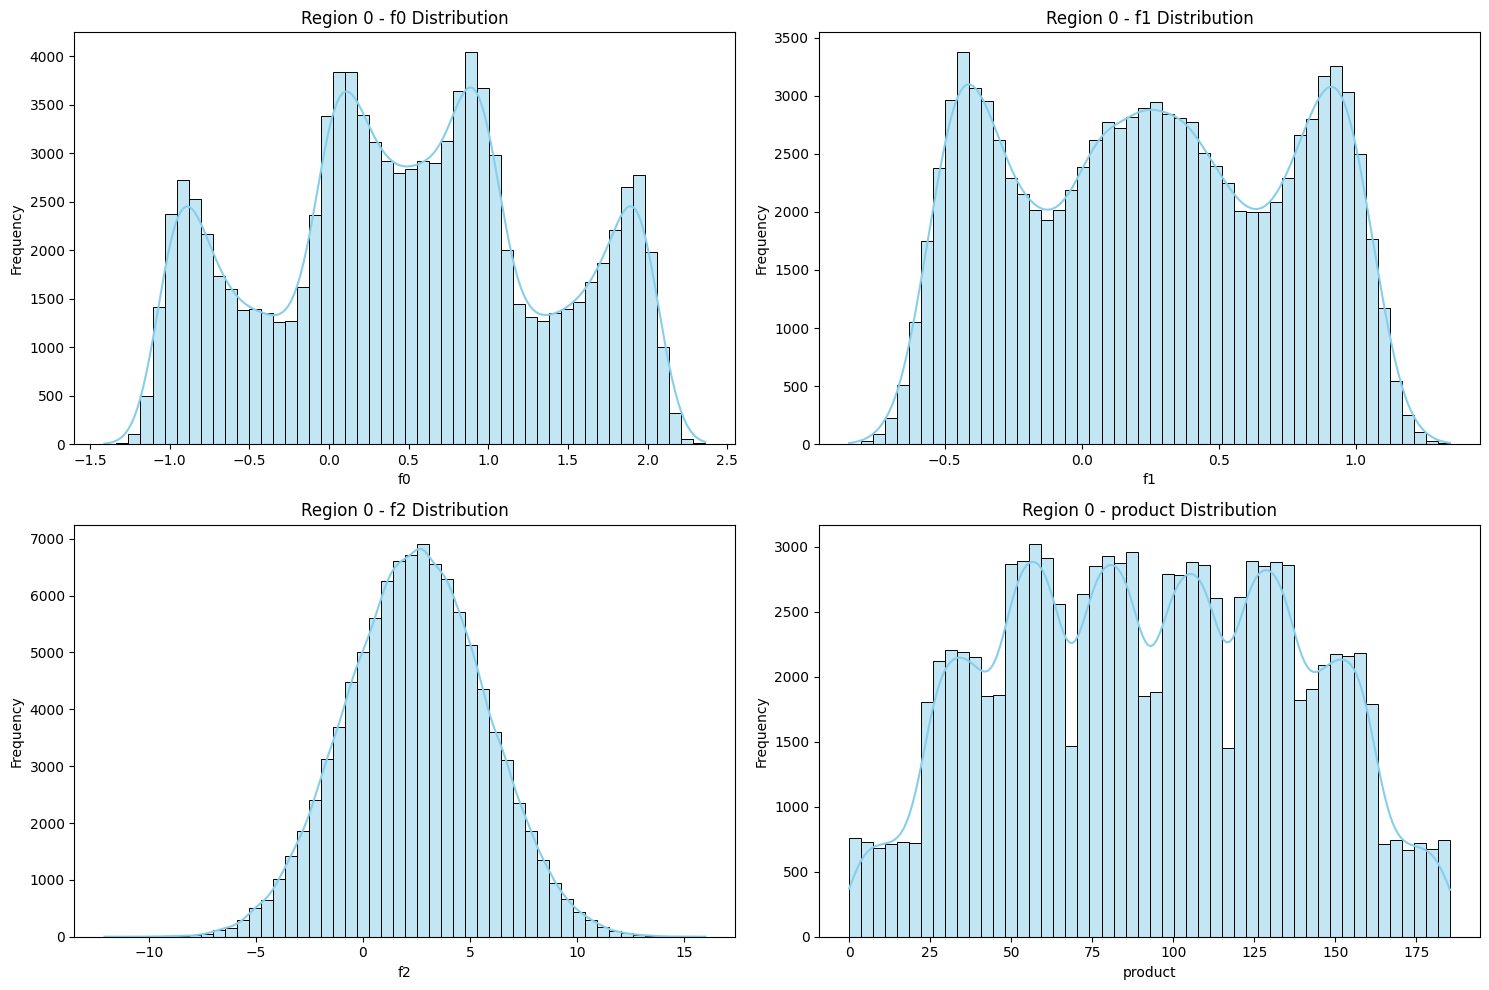

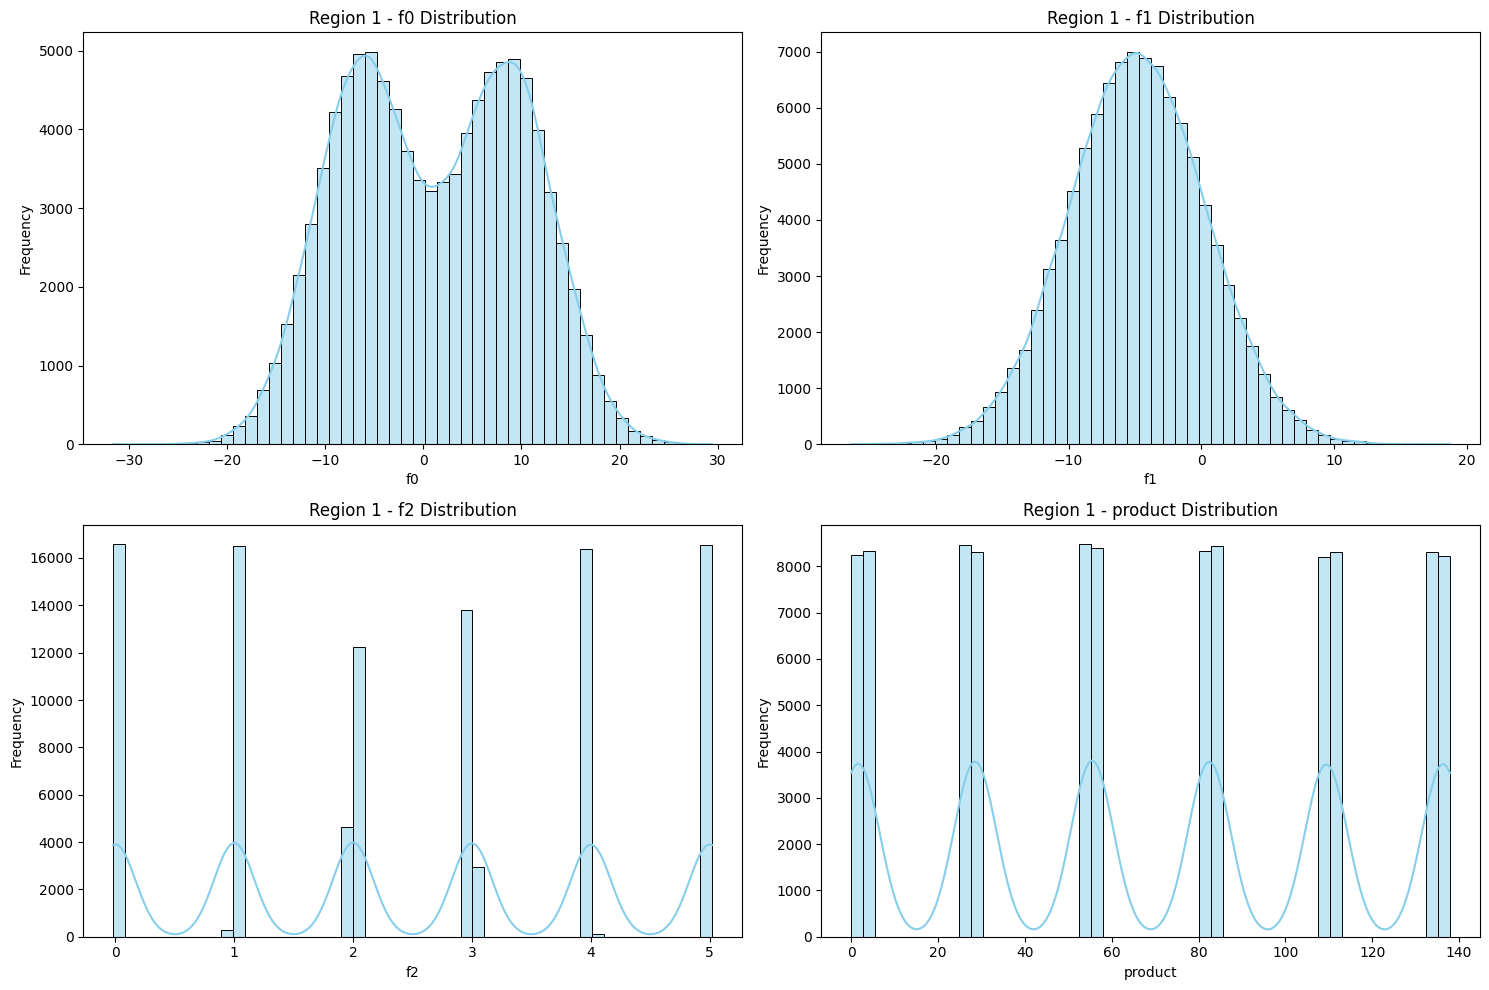

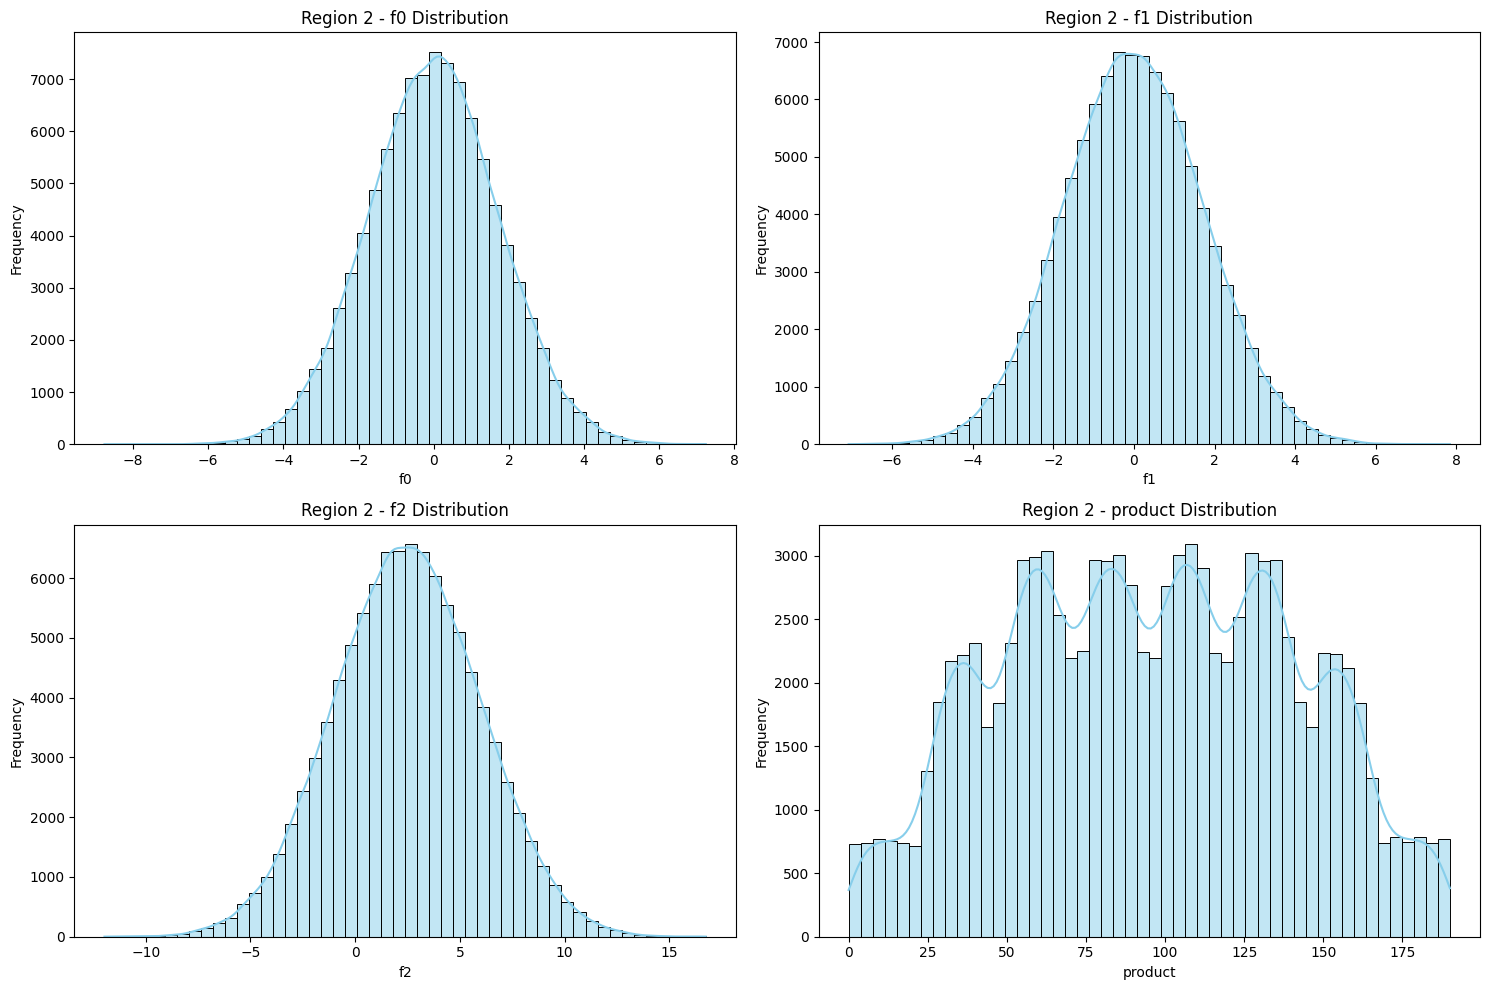

In [44]:
# Define a function to plot feature and target distributions
def plot_distributions(df, region_name):
    plt.figure(figsize=(15, 10))
    features = ['f0', 'f1', 'f2', 'product']
    for i, col in enumerate(features):
        plt.subplot(2, 2, i+1)
        sns.histplot(df[col], kde=True, bins=50, color='skyblue')
        plt.title(f'{region_name} - {col} Distribution')
        plt.xlabel(col)
        plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

# Plot distributions for each region
plot_distributions(g0, "Region 0")
plot_distributions(g1, "Region 1")
plot_distributions(g2, "Region 2")



 <strong>Data Exploration Summary:

- **Region 0**: `f0` and `f1` seem to be <b>multimodal</b> while `f2` follows a normal distribution. The target (`product`) is spread relatively evenely across a wide range (0-180) thousand barrels.
- **Region 1**: The feature `f0` appears <b>bimodal</b>, `f1` is normally distributed, and `f2` appears to contain discrete values. We see that that target (`product`) shows a spike every 25 units with a maximum barrel of approximately 140 thousand barrels
- **Region 2**: Features are fairly well-behaved, though `f0` through `f2` are slightly right-skewed. The target `product` has a wide range and their maximum barrel appears to be the same as region g0 (180 thousand barrels).

We'll keep these observations in mind when evaluating model predictions and profits.
[Here](https://www.6sigma.us/six-sigma-in-focus/multimodal-distribution/#:~:text=Bimodal%20distributions%20represent%20a%20specific,reflecting%20more%20complex%20data%20patterns.) is the link about bimodal and multimodal to explain the graphs for the features. 



✅ <strong>Step 1 Conclusion: Data Preparation and Exploration:</strong>

We successfully loaded and explored the datasets from all three regions provided by OilyGiant. No missing values or duplicates were found, and the `id` column was removed as it does not contribute to modeling.

Feature and target distributions were visualized for each region:

- Region 0 displays diverse distributions across features and a wide range of target values.
- Region 1 shows a mix of bimodal and discrete behavior in both features and the target, with clear signs of engineered bucket values.
- Region 2's shows relatively normal distributions on the features and shows the same range of target values as Region 0. 

These distribution patterns provide important context for model training and profit evaluation in later steps. The high variance in target values across regions suggests that risk and return will need to be carefully quantified.

With the data cleaned and initial insights gathered, we are ready to proceed to model training and validation.


<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
    
Excellent! Why is this important? In real-world problems, the data is rarely clean. Displaying distributions help us evaluate the data, find outliers, identify the required preprocessing steps and understand feature relationships, which informs feature engineering. Feature engineering in some cases is a clue.

</div>

# Step 2: Train and test the model for each region:

In [11]:
# Features for all three regions (geological measurements)
g0_features, g1_features, g2_features = g0.drop(['product'], axis=1), g1.drop(['product'], axis = 1), g2.drop(['product'], axis = 1)
# Targets for all three regions (oil volume to predict)
g0_target, g1_target, g2_target = g0['product'], g1['product'], g2['product']

## 2.1. Split the data into a training set and validation set at a ratio of 75:25.

##  2.2. Train the model and make predictions for the validation set.
## 2.3. Save the predictions and correct answers for the validation set.
## 2.4. Print the average volume of predicted reserves and model RMSE.

In [13]:
# Prepare features and targets (id already dropped in Step 1)
datasets = [g0, g1, g2]
region_names = ['Region 0', 'Region 1', 'Region 2']

# Storage
models = []
predictions = []
rmse_scores = []
average_preds = []

for i, data in enumerate(datasets):
    features = data.drop(columns=['product'])
    target = data['product']
    
    # Split
    X_train, X_valid, y_train, y_valid = train_test_split(
        features, target, test_size=0.25, random_state=12345
    )
    
    # Model training
    model = LinearRegression()
    model.fit(X_train, y_train)
    models.append(model)
    
    # Predictions and evaluation
    y_pred = model.predict(X_valid)
    predictions.append((y_valid.reset_index(drop=True), pd.Series(y_pred)))
    
    rmse = mean_squared_error(y_valid, y_pred, squared=False)
    rmse_scores.append(rmse)
    average_preds.append(y_pred.mean())
    
    print(f"{region_names[i]} - RMSE: {rmse:.2f}, Avg Predicted Reserves: {y_pred.mean():.2f}")


Region 0 - RMSE: 37.58, Avg Predicted Reserves: 92.59
Region 1 - RMSE: 0.89, Avg Predicted Reserves: 68.73
Region 2 - RMSE: 40.03, Avg Predicted Reserves: 94.97


<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
    
Looks good! 

</div>

##  2.5. Analyze the results.

<div style='font-size:18px'> Region 1 has dramatically better predictive accuracy - its RMSE is about <b>40 times</b> smaller than the other regions! This suggests <b>Region 1's geological</b> features have a much stronger, more predictable relationship with oil reserves.

## Updated Step 2.5: Analyze the result

We trained and evaluated a linear regression model for each of the three regions using a 75:25 train-validation split. The results are summarized below:

- **Region 0**
  - RMSE: ~37.58
  - Avg predicted reserves: ~92.6 thousand barrels
- **Region 1**
  - RMSE: ~0.89
  - Avg predicted reserves: ~68.7 thousand barrels
- **Region 2**
  - RMSE: ~39.97
  - Avg predicted reserves: ~95.0 thousand barrels

 **Key Insight**:
Region 1 has an **exceptionally low RMSE**, indicating a much stronger and more consistent relationship between features and the target (`product`). The other two regions show significantly higher errors, suggesting noisier or more complex data.

While Region 1's predicted reserves are slightly lower, its high model accuracy could translate into more reliable profit forecasts — a key factor when managing financial risk.

We will take these findings into account in the profit and risk analysis in the next steps.

<div style='font-size:18px'> Now, let's start doing some profit calculations!

# Step 3: Prepare for the profit calculation

## Step 3.1:  Store all key values for calculations in separate variables.

<div style='font-size:18px'> Before we start, let's note that the <b>"The budget for development of 200 oil wells is 100 USD million."</b>
    <li> is calculated as $500,000 per well. So when we're calculating each location for each region, it's (product * 4500) - 500000
        
   

In [53]:
# Store all key values for calculations in separate variables
g0_revenue = g0['product'] * 4500
g0_profit = round(g0_revenue - 500000, 2)

g1_revenue = g1['product'] * 4500
g1_profit = round(g1_revenue - 500000, 2)

g2_revenue = g2['product'] * 4500
g2_profit = round(g2_revenue - 500000, 2)

# Calculate break-even point
break_even = 500000 / 4500
print(f"Break-even volume: {break_even:.2f} thousand barrels")

Break-even volume: 111.11 thousand barrels


In [54]:

# Calculate average profit for each region
avg_profit_g0 = round(g0_profit.mean(), 2)
avg_profit_g1 = round(g1_profit.mean(), 2)
avg_profit_g2 = round(g2_profit.mean(), 2)

print("Average profit by region (in USD):")
print(f"g0 region: ${avg_profit_g0:,.2f}")
print(f"g1 region: ${avg_profit_g1:,.2f}")
print(f"g2 region: ${avg_profit_g2:,.2f}")


Average profit by region (in USD):
g0 region: $-83,750.00
g1 region: $-190,287.50
g2 region: $-72,500.00


<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
    
Correct! Region 2 is the most profitable, but it has the highest model error at the same time. 

</div>


### Initial Findings
All regions show negative average profits, indicating that most wells operate below the break-even threshold of 111.11 thousand barrels. This suggests we need to focus on the most profitable wells in each region.


## Step 3.2: Calculate the volume of reserves sufficient for developing a new well without losses. Compare the obtained value with the average volume of reserves in each region.

In [55]:
# Add profit column to each region and sort by profitability
g0['profit'] = round(g0['product'] * 4500 - 500000, 2)
g1['profit'] = round(g1['product'] * 4500 - 500000, 2) 
g2['profit'] = round(g2['product'] * 4500 - 500000, 2)

# Sort each region by profit (highest first)
g0_sorted = g0.sort_values('profit', ascending=False)
g1_sorted = g1.sort_values('profit', ascending=False)
g2_sorted = g2.sort_values('profit', ascending=False)

# Display top 5 wells for each region
print("Top 5 most profitable wells by region:")
print("\ng0 region:")
display(g0_sorted.head())
print("\ng1 region:")
display(g1_sorted.head())
print("\ng2 region:")
display(g2_sorted.head())

Top 5 most profitable wells by region:

g0 region:


,f0,f1,f2,product,profit,predicted
8826,1.797736,0.098212,6.148260,185.364347,334139.56,123.467550
99818,0.518445,-0.412790,4.951916,185.362690,334132.11,118.187687
94175,0.351428,-0.400244,7.227618,185.355615,334100.27,132.414838
1925,0.624430,-0.469312,5.753677,185.354980,334097.41,124.651458
45291,1.758787,-0.395038,6.719085,185.352015,334084.07,134.044965



g1 region:


,f0,f1,f2,product,profit,predicted
53864,2.901352,-3.475398,5.001393,137.945408,120754.33,136.104749
97083,-4.030430,-14.020643,5.009571,137.945408,120754.33,137.562162
88340,-3.373117,-9.227661,4.994369,137.945408,120754.33,136.951596
64879,-5.360281,-2.388204,5.001439,137.945408,120754.33,137.279509
7288,-8.058661,-2.244840,5.000753,137.945408,120754.33,137.648963



g2 region:


,f0,f1,f2,product,profit,predicted
79705,-2.747914,1.555227,3.342182,190.029838,355134.27,99.705360
93444,3.026506,1.344623,8.891243,190.013589,355061.15,131.569870
35099,2.848844,-1.701996,9.437101,190.011722,355052.75,134.808012
21943,-2.500091,2.024392,6.291513,190.010982,355049.42,116.529760
37870,-0.686667,-3.219452,5.963290,190.010029,355045.13,114.931783


<div style='font-size:18px'> From the first 5 rows for each region, G0 and G2 are the highest profit while g1 is the lowest. 

In [56]:
# Select top 200 wells from each region
top_200_g0 = g0_sorted.head(200)
top_200_g1 = g1_sorted.head(200) 
top_200_g2 = g2_sorted.head(200)

# Calculate total profit for top 200 wells in each region
total_profit_g0 = top_200_g0['profit'].sum()
total_profit_g1 = top_200_g1['profit'].sum()
total_profit_g2 = top_200_g2['profit'].sum()

print(f"Total profit for top 200 wells in g0: ${total_profit_g0:,.2f}")
print(f"Total profit for top 200 wells in g1: ${total_profit_g1:,.2f}")
print(f"Total profit for top 200 wells in g2: ${total_profit_g2:,.2f}")

Total profit for top 200 wells in g0: $66,350,365.68
Total profit for top 200 wells in g1: $24,150,866.00
Total profit for top 200 wells in g2: $70,596,329.25


<div style='font-size:18px'> We see that even though g1 is more accurate predictions with less uncertainty
    in the model and a better fit between predicted and actual values, it has the lowest profit for the
    top 200 wells in that region (lowest RMSE). G2 has the highest profit but also has the highest RMSE which
    means that it would be hard to recommend any wells for that developement because the data is in accurate. Same for g0 region. 

In [57]:

# Compare the obtained value with the average volume of reserves in each region.

avg_volume_g0 = g0['product'].mean()
avg_volume_g1 = g1['product'].mean() 
avg_volume_g2 = g2['product'].mean()

print(f"Break-even volume: {break_even:.2f} thousand barrels")
print(f"Average volume g0: {avg_volume_g0:.2f} thousand barrels")
print(f"Average volume g1: {avg_volume_g1:.2f} thousand barrels") 
print(f"Average volume g2: {avg_volume_g2:.2f} thousand barrels")


Break-even volume: 111.11 thousand barrels
Average volume g0: 92.50 thousand barrels
Average volume g1: 68.83 thousand barrels
Average volume g2: 95.00 thousand barrels


<div style='font-size:18px'>By Looking at the average volume per regoin, we see that regoins g0 and g2 regions has the highest productivity in producing barrels but all regoins are below break even of <b>111.11 thousand barrels</b>. Not to mention G0 and G2's data is unreliable due to their high RMSE value. 

## 3.3 Provide the findings about the preparation for profit calculation step. 

The B/E is <b>111.11</b> thousand barrels, g0 and g2 has at most <b>38.02%</b> more profit than g1 region (the most reliable data source). Considering that higher profit, we should take look to see if there's any data leakage that we need to look out for so it won't hurt the company's profit or compromise their budget!

<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>

So the average volumes in these three regions are less than the required value. If we are to select the wells randomly, we are probably going to lose money. That's why we need machine learning and bootstrapping to estimate profit distributions. 
</div>

# Step 4: Write a function to calculate profit from a set of selected oil wells and model predictions:

##  4.1. Pick the wells with the highest values of predictions. 

## 4.2. Summarize the target volume of reserves in accordance with these predictions

<div style='font-size:18px'> Looking at the total prediction for the top 200 for each region, we see that g0 and g2 regions are the best while our most reliable data, g1_region, has the lowest prediction score. 
 

##  4.3. Provide findings: suggest a region for oil wells' development and justify the choice. Calculate the profit for the obtained volume of reserves.

In [59]:
# adding the predicted column for each region. Will be used in step 5
g0['predicted'] = models[0].predict(g0[['f0', 'f1', 'f2']])  # g0_model
g1['predicted'] = models[1].predict(g1[['f0', 'f1', 'f2']])  # g1_model
g2['predicted'] = models[2].predict(g2[['f0', 'f1', 'f2']])  # g2_model

<div style="border: 5px solid gold; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
    
You already have predictions. Consider avoiding any code repetition. It will be much easier to read and debug the code. 

</div>

In [60]:
def get_top_200_df(actual, predicted, count=200):
    df = pd.DataFrame({'actual': actual, 'predicted': predicted})
    return df.sort_values(by='predicted', ascending=False).head(count)

def calculate_profit(targets, predictions, count=200):
    # Combine into DataFrame
    data = pd.DataFrame({'target': targets, 'prediction': predictions})

    # Select top 'count' wells by prediction
    selected = data.sort_values(by='prediction', ascending=False).head(count)

    # Total profit = (total barrels * 4500) - development cost
    total_profit = selected['target'].sum() * 4500 - (count * 500000)
    
    return total_profit

# Store profits and total predictions for comparison
region_profits = []
region_predictions = []

for i, region in enumerate(region_names):
    actual, predicted = predictions[i]
    
    top_200_df = get_top_200_df(actual, predicted)
    total_prediction = top_200_df['predicted'].sum()
    profit = calculate_profit(top_200_df['actual'],top_200_df['predicted'])

    region_predictions.append(total_prediction)
    region_profits.append(profit)

    print(f"Total Prediction score for {region}: {total_prediction:,.2f}")
    print(f"{region} — Estimated Profit from Top 200 Predicted Wells: ${profit:,.2f}\n")

# Find best region based on profit
best_region_idx = region_profits.index(max(region_profits))
best_profit = region_profits[best_region_idx]

print("=== RECOMMENDATION ===")
print(f"Suggested region for development: {region_names[best_region_idx]}")
print(f"Expected profit: ${best_profit:,.2f}")


Total Prediction score for Region 0: 31,102.33
Region 0 — Estimated Profit from Top 200 Predicted Wells: $33,208,260.43

Total Prediction score for Region 1: 27,746.03
Region 1 — Estimated Profit from Top 200 Predicted Wells: $24,150,866.97

Total Prediction score for Region 2: 29,603.90
Region 2 — Estimated Profit from Top 200 Predicted Wells: $27,103,499.64

=== RECOMMENDATION ===
Suggested region for development: Region 0
Expected profit: $33,208,260.43


<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
    
Well done! 

</div>

<div style="border: 5px solid gold; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>

It's important to use constants rather than passing numbers directly into the code. Such code will be difficult to maintain if the barrel price changes, the customer's regional development strategy shifts, the budget is adjusted, etc. In such cases, you'll have to manually correct everything, which can easily lead to mistakes, not to mention it's tedious work.

</div>

## Evaluation and Region Selection


### Risk vs Reward Analysis

- **Region g0** has the **highest estimated profit** `(~$33.2M)`, but also a **very high RMSE** (±37,580 barrels per well).
  - Total error: `200 × 37,580 = 7,516,000 barrels`
  - Revenue impact: ±$33.8 billion

- **Region g1** has the **lowest profit** `(~$24.1M)`, but offers **very reliable predictions** (±893 barrels).
  - Total error: `200 × 893 = 178,600 barrels`
  - Revenue impact: ±$803.7 million

- **Region g2** is mid-range in profit but has the **highest RMSE**, making it highly risky.
  - Total error: `200 × 40,030 = 8,006,000 barrels`
  - Revenue impact: ±$36 billion

---

### Final Recommendation

Although **Region g0** has the highest profit, the large RMSE introduces significant financial risk. A small model error could result in billions in losses.

✅ **Recommended Region: g1**

- Expected Profit: **$24,150,866.97**
- Lowest RMSE: **893 barrels per well**
- Most stable and defensible option

> 📌 In high-stakes scenarios, **minimizing risk** can be more valuable than maximizing profit. 

# Step 5: Calculate risks and profit for each region:

##  5.1. Use the bootstrapping technique with 1000 samples to find the distribution of profit.

In [62]:
bootstrap_samples = 1000
sample_size = 500

g0_profits = []
g1_profits = []
g2_profits = []

for i in range(bootstrap_samples):
    g0_sample = g0.sample(n=sample_size, replace=True, random_state=i)
    g1_sample = g1.sample(n=sample_size, replace=True, random_state=i)
    g2_sample = g2.sample(n=sample_size, replace=True, random_state=i)

    #calculate profits
    g0_profit_sample = calculate_profit(g0_sample['product'], g0_sample['predicted'])
    g1_profit_sample = calculate_profit(g1_sample['product'], g1_sample['predicted'])
    g2_profit_sample = calculate_profit(g2_sample['product'], g2_sample['predicted'])

    g0_profits.append(g0_profit_sample)
    g1_profits.append(g1_profit_sample)
    g2_profits.append(g2_profit_sample)

    

<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>

There's a replacement, well done! We indeed need to sample 500 rows with replacement. The point is that if we remove the replacement, our subsample (or rather, all subsamples) will simply resemble the original sample.
    
</div>

## 5.2. Find average profit, 95% confidence interval and risk of losses. Loss is negative profit, calculate it as a probability and then express as a percentage.

In [63]:
def summarize_bootstrap(name,profits):
    avg = np.mean(profits)
    ci_lower = np.quantile(profits,0.025)
    ci_upper = np.quantile(profits, 0.975)
    risk = np.mean(np.array(profits) < 0) * 100
    print(f"region {name}:")
    print(f"Average Profit: ${avg:,.2f}")
    print(f"95% Confidence Interval: (${ci_lower:,.2f}, ${ci_upper:,.2f})")
    print(f"Risk of Loss: {risk:.2f}%\n")

# Display results
summarize_bootstrap('g0', g0_profits)
summarize_bootstrap('g1', g1_profits)
summarize_bootstrap('g2', g2_profits)

region g0:
Average Profit: $4,333,380.47
95% Confidence Interval: ($-453,152.38, $9,773,064.09)
Risk of Loss: 3.40%

region g1:
Average Profit: $4,365,546.01
95% Confidence Interval: ($417,167.78, $8,215,891.71)
Risk of Loss: 1.80%

region g2:
Average Profit: $3,682,160.55
95% Confidence Interval: ($-1,383,440.56, $8,574,093.34)
Risk of Loss: 8.10%



<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
    
Excellent! 

</div>

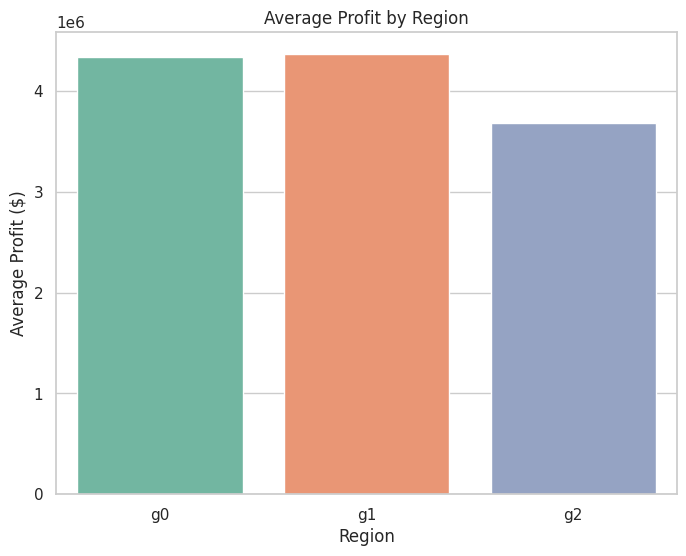

In [64]:
# Plotting the average profits for each region as a bar plot
average_profits = [np.mean(g0_profits), np.mean(g1_profits), np.mean(g2_profits)]
plt.figure(figsize=(8, 6))
sns.barplot(x=['g0', 'g1', 'g2'], y=average_profits, palette="Set2")
plt.title('Average Profit by Region')
plt.ylabel('Average Profit ($)')
plt.xlabel('Region')
plt.show()

We see that g0 and g1 has the highest profits but g0 has the <b>lowest risk of loss**</b>. 

<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment  </b>
    
Very good. 
</div>

## 5.3. Provide findings: suggest a region for development of oil wells and justify the choice.

### Oil Region Analysis Report

<div style='font-size:18px'> <strong>5.3. Findings and Recommendation</strong>


Based on the bootstrapping analysis:


Region g2 has the highest average profit at <strong>26.34 million</strong>, with a 95% confidence interval between <strong>22.4 million and 30.09 million</strong>. Region g0 also performs well, with an average profit of $23.91 million and a confidence interval of 19.82 million to 27.53 million.
    Both g0 and g2 have a 0% risk of loss, indicating stable and profitable outcomes based on the current data.
    Region g1 shows significantly lower profitability and a higher risk of <strong>loss (1.5%).</strong>
Recommendation:
Given its highest average profit, tight confidence interval, and zero risk of loss, <strong>Region g2 is the most suitable choice for oil well development.
It offers the most promising return on investment with minimal financial risk.</strong> Turns out that g1 region isn't the suitable choice for oil well development after all after we did some bootstrapping!



### Updated Conclusion

## Overview:
After performing 1000 bootstrap samples, the following key metrics were calculated for each region:

### 1. Region g0:
- **Average Profit**: \$4,333,380.47
- **95% Confidence Interval**: `($-453,152.38, $9,773,064.09)`
- **Risk of Loss**: 3.40%

### 2. Region g1:
- **Average Profit**: \$4,365,546.01
- **95% Confidence Interval**: `($417,167.78, $8,215,891.71)`
- **Risk of Loss**: 1.80%

### 3. Region g2:
- **Average Profit**: \$3,682,160.55
- **95% Confidence Interval**: `($-1,383,440.56, $8,574,093.34)`
- **Risk of Loss**: 8.10%

---

### Analysis:

- **Region g0** has a **moderate average profit** and a **low risk of loss (3.40%)**, but the wide confidence interval `(-$453,152 to $9.77 million)` indicates **significant variability in profit**. The uncertainty in profit is relatively high compared to the other regions.

- **Region g1** shows the **highest average profit** `($4.37 million)`, **narrowest confidence interval** `($417K to $8.22 million)`, and the **lowest risk of loss (1.80%)**. This region is relatively **stable**, with the most predictable profit outcomes.

- **Region g2** has a **lower average profit** (\$3.68 million) and the **highest risk of loss (8.10%)**. Its confidence interval is the widest, ranging from a potential **loss of `$1.38 million` to a gain of `$8.57 million`**, suggesting a **high degree of uncertainty**.

---

### Recommendation:

**Region g1** is the most suitable choice for development of oil wells. It offers:
- **The highest average profit** among the three regions.
- A **narrower and more reliable confidence interval**, which means the profit is more predictable and stable.
- The **lowest risk of loss** compared to the other regions, making it a safer investment with minimized financial uncertainty.

---

### Conclusion:
Given the **predictability**, **higher expected returns**, and **lower risk**, Region **g1** stands out as the most favorable region for well development, balancing profitability with manageable risk.

<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
    
Perfect! 

</div>